#  Feature Engineering and Polynomial Regression Lab



In this lab we will explore feature engineering and polynomial regression which allows us to use the machinery of linear regression to fit very complicated, even very non-linear functions.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

## Feature Engineering and Polynomial Regression Overview

Out of the box, linear regression provides a means of building models of the form:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 
What if our features/data are non-linear or are combinations of features? For example,  Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.


### Polynomial Features

Above we were considering a scenario where the data was non-linear.<br>
Now we try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: $y = 1+x^2$

We're familiar with all the routines we're using. They are available in the lab_utils.py file for review. We'll use [`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) which is a NumPy routine to concatenate along the column boundary.

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


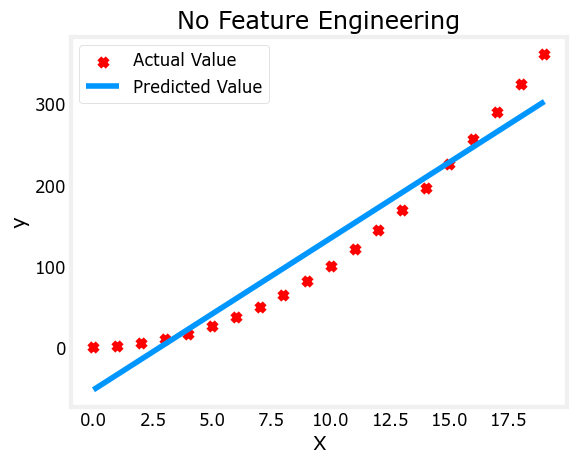

In [4]:
#creating target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-2)#taking alpha 1e-2

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("No Feature Engineering")
plt.plot(x, X@model_w + model_b, label="Predicted Value")
plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Well, as expected we can see, not a great fit. What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.<br>
To accomplish this, we can modify the *input data* to *engineer* the needed features.<br>If we swap the original data with a version that squares the $x$ value, then we can achieve $y= w_0x_0^2 + b$.<br>
Now we try it swapping `X` for `X**2` below:

In [6]:
#creating target data
x = np.arange(0, 20, 1)
y = 1 + x**2
# Engineering features
X = x**2#added engineered feature

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


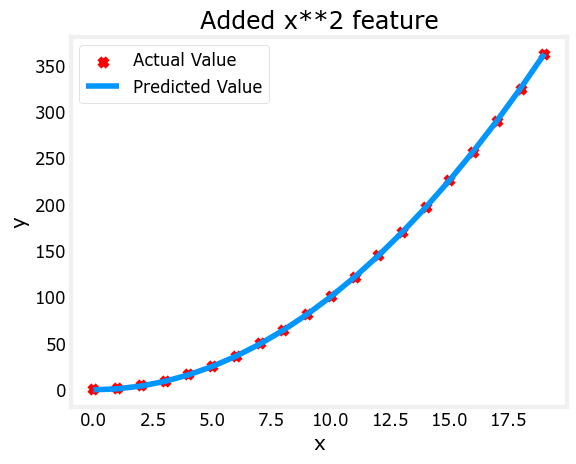

In [7]:
X = X.reshape(-1, 1)  # X should be a 2-D Matrix
model_w, model_b = run_gradient_descent_feng(
    X, y, iterations=10000, alpha=1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Added x**2 feature")
plt.plot(x, np.dot(X, model_w) + model_b, label="Predicted Value")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()